# Parte 1

### Corrente máxima que circula no sensor

Is_max    | 7.5mA
--------- | ------

### Potência Máxima Dissipada em cada componente
    
Resistor   | Potência (mW)
--------- | ------
R1 | 84.37
R2 | 84.37
R3 | 5.63
R4 | 7.45
R5 | 0.03

#### Demais Resistores: internos em um amplificador de Instrumentação (INA121P)

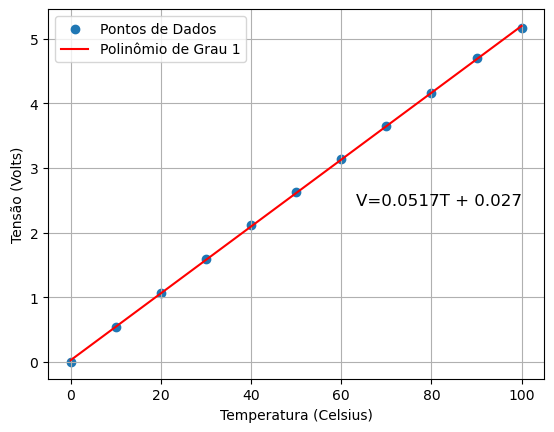

In [32]:
# Curva de Calibração Estática

import numpy as np
import matplotlib.pyplot as plt

# Valores de temperatura - Equivalentes em 
# resistência são substituídos no circuito do LTSpice
# Para gerar a tensão final
temp = np.arange(0,110,10) 
tensao = np.array([0, 0.534, 1.064, 1.590, 2.112, 2.631, 3.144, 3.653, 4.159, 4.696, 5.160])

# Grau do polinômio a ser ajustado
grau_do_polinomio = 1

# Ajustar o polinômio usando np.polyfit
coeficientes = np.polyfit(temp, tensao, grau_do_polinomio)

# Criar uma função polinomial com os coeficientes obtidos
funcao_polinomial = np.poly1d(coeficientes)

# Gerar pontos para o gráfico da função ajustada
y_fit = funcao_polinomial(temp)

# Plotar os pontos de dados originais e a função ajustada
plt.scatter(temp, tensao, label='Pontos de Dados')
plt.plot(temp, y_fit, label=f'Polinômio de Grau {grau_do_polinomio}', color='red')
plt.xlabel('Temperatura (Celsius)')
plt.ylabel('Tensão (Volts)')
plt.legend()
plt.grid(True)
plt.text(100, 2.5, f'V={round(coeficientes[0],3)}T + {round(coeficientes[1],3)}', fontsize=12, ha='right', va='center', color='black')
plt.show()

# Parte 2

### Modelo Dinâmico: 


#### Item 1 - Modelo Dinâmico para o Sensor
K = $\frac{138.50-100}{100-0} = 0.385$

$\tau = \frac{0.3}{5} = 0.06$

$H(s) = \frac{0.385}{0.06 s + 1}$

#### Item 2 - Modelo Dinâmico para o conjunto sensor + circuito de condicionamento
K = $\frac{5.160-0}{100-0} = 0.0516$
$\tau = \frac{0.3}{5} = 0.06$

$H(s) = \frac{0.0516}{0.06 s + 1}$

#### Item 3 - Simulação da saída para um degrau de 0 a 100 Celsius - Veja abaixo

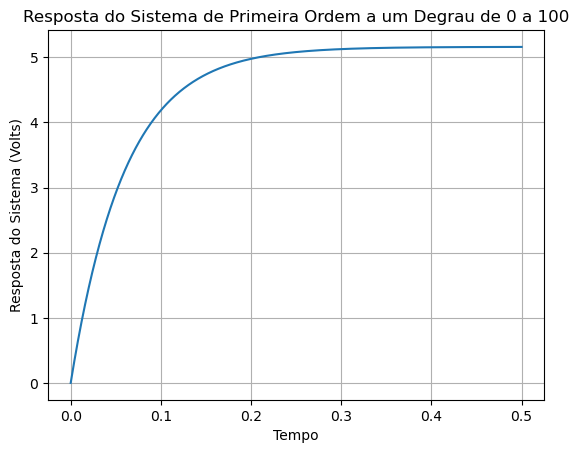

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parâmetros do sistema de primeira ordem
K = 0.0516
tau = 0.06

# Definir a função de transferência do sistema
num = [K]
den = [tau, 1]
system = signal.TransferFunction(num, den)

# Tempo de simulação
t = np.linspace(0, 0.5, 1000)

# Sinal de entrada: degrau unitário
u = np.ones_like(t) * 100  # Degrau de 0 a 100

# Simulação da resposta do sistema
t, y, _ = signal.lsim(system, U=u, T=t)

# Plotar a resposta do sistema
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Resposta do Sistema (Volts)')
plt.title('Resposta do Sistema de Primeira Ordem a um Degrau de 0 a 100')
plt.grid(True)
plt.show()